In [1]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
#MUTUAL INFORMATION PARA CLASSIFICAÇÃO
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import joblib
import seaborn as sb
import numpy as np
import pandas as pd

In [2]:
data = load_breast_cancer()
dataDisp = pd.read_excel('DadosTreinamento.xlsx')

### Exploração dos Dados ###

As análises abaixo mostram as proporções dos dados e a quantidade de cada uma das duas labels dentro do DataSet, para nos ajudar a verificar se a proporção se encontra correta, ou se será necessário a redução de uma das labels, para não enviesar o resultado do modelo

In [3]:
dataDisp[dataDisp['STATUS'] == 'Ativa'].describe()

,KM_RODADO,SERVICO_EXTERNO,SERVICO_INTERNO,NAO_GEROU_INDISP,GEROU_INDISP,OS_MOTOR,OS_FREIO,OS_CABINE,OS_ELETRICA,OS_PNEUS,OS_CARROCERIA,OS_CONTRATO_MANUTENCAO,OS_EMBREAGEM,OS_REVISAO,OS_CONTRATO_ELETRICA,OS_TRANSMISSAO,OS_MANUTENCAO_PREVENTIVA,OS_OUTROS
count,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000
mean,90061.706657,133.373073,5.329071,134.470854,4.231290,6.938699,2.154193,22.389996,17.521249,17.886800,23.140654,6.363671,0.703648,0.860098,2.343362,0.800301,1.308011,36.291463
std,68487.472959,93.178199,10.856667,96.324224,8.018525,8.552608,3.267644,16.876489,21.901633,12.904245,24.810216,8.385899,1.615211,1.207569,7.318599,1.515031,1.465523,28.165714
min,100.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50488.000000,58.000000,0.000000,56.000000,0.000000,2.000000,0.000000,8.000000,5.000000,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,67692.000000,122.000000,1.000000,121.000000,1.000000,4.000000,1.000000,21.000000,12.000000,16.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,36.000000
75%,110567.000000,195.000000,6.000000,192.500000,5.000000,8.000000,3.000000,32.000000,21.000000,24.000000,35.000000,11.000000,1.000000,2.000000,0.000000,1.000000,2.000000,58.000000
max,453501.000000,688.000000,152.000000,736.000000,148.000000,78.000000,44.000000,190.000000,185.000000,148.000000,238.000000,49.000000,15.000000,8.000000,61.000000,18.000000,6.000000,168.000000


In [4]:
dataDisp[dataDisp['STATUS'] == 'Inativa'].describe()

,KM_RODADO,SERVICO_EXTERNO,SERVICO_INTERNO,NAO_GEROU_INDISP,GEROU_INDISP,OS_MOTOR,OS_FREIO,OS_CABINE,OS_ELETRICA,OS_PNEUS,OS_CARROCERIA,OS_CONTRATO_MANUTENCAO,OS_EMBREAGEM,OS_REVISAO,OS_CONTRATO_ELETRICA,OS_TRANSMISSAO,OS_MANUTENCAO_PREVENTIVA,OS_OUTROS
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,121175.419619,198.283379,7.264305,196.065395,9.482289,11.929155,3.659401,32.482289,31.539510,24.882834,34.847411,8.847411,1.702997,1.215259,4.310627,1.580381,1.419619,47.130790
std,92198.383909,90.578628,11.229518,91.283568,13.686741,10.587930,4.258205,20.154027,30.355956,15.086269,26.779583,9.622869,2.290767,1.414208,10.625337,1.952565,1.453636,27.104116
min,5275.000000,12.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58509.500000,129.500000,0.000000,128.000000,0.000000,4.000000,1.000000,19.000000,11.000000,16.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
50%,76440.000000,198.000000,3.000000,192.000000,5.000000,8.000000,2.000000,32.000000,21.000000,23.000000,29.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,47.000000
75%,179322.500000,253.000000,10.000000,260.000000,12.000000,17.000000,6.000000,44.000000,38.000000,29.000000,47.000000,15.000000,2.500000,2.000000,2.000000,2.000000,2.000000,67.000000
max,454491.000000,484.000000,77.000000,498.000000,81.000000,46.000000,24.000000,105.000000,166.000000,84.000000,122.000000,49.000000,15.000000,5.000000,61.000000,10.000000,5.000000,116.000000


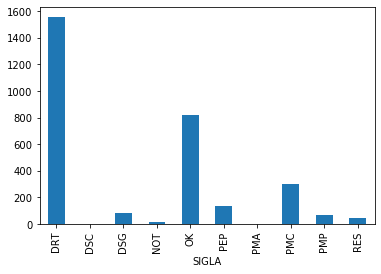

In [5]:
#GRÁFICO POR SIGLA DE MOTIVO
df = dataDisp.groupby(['SIGLA'])['STATUS'].count()
df.plot.bar()

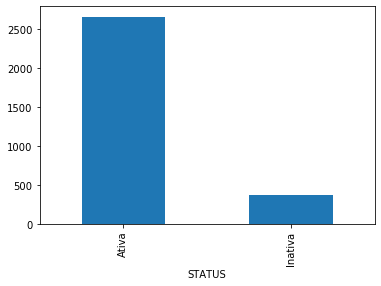

In [6]:
#GRÁFICO POR SIGLA DE MOTIVO
df = dataDisp.groupby(['STATUS'])['STATUS'].count()
df.plot.bar()

É possível notar uma proporção muito maior de Ativos do que de Inativos, isso poderá prejudicar os resultados do treinamento, levando sempre a uma resposta enviesada. Um segundo DataSet, com uma quantidade reduzida de Ativos, irá ser criado e analisaremos os resultados em cima desse. O objetivo dessa redução é dar um treinamento mais interessante para o modelo a ser criado, de tal forma a tentar não trazer uma desproporção tão grande nas labels.

In [7]:
dataDisp = pd.read_excel('DadosTreinamentoReduzidoDois.xlsx')

In [8]:
dataDisp[dataDisp['STATUS'] == 'Ativa'].describe()

,KM_RODADO,OS_MOTOR,OS_FREIO,OS_CABINE,OS_ELETRICA,OS_PNEUS,OS_CARROCERIA,OS_CONTRATO_MANUTENCAO,OS_EMBREAGEM,OS_REVISAO,OS_CONTRATO_ELETRICA,OS_TRANSMISSAO,OS_MANUTENCAO_PREVENTIVA,OS_OUTROS
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,84502.955610,6.482121,2.014797,22.208385,18.842170,17.635018,22.718866,6.556104,0.673243,0.836005,2.673243,0.774353,1.205919,34.329223
std,66919.686128,7.925151,3.386214,18.119623,25.134547,13.298471,24.492072,8.957251,1.655671,1.213702,8.104442,1.458778,1.440427,28.173823
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47007.500000,1.000000,0.000000,6.000000,5.000000,9.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,66111.000000,4.000000,1.000000,20.000000,12.000000,16.000000,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,33.000000
75%,108650.500000,8.000000,3.000000,34.000000,22.000000,24.000000,35.500000,11.000000,1.000000,1.000000,0.000000,1.000000,2.000000,56.500000
max,399400.000000,54.000000,44.000000,190.000000,181.000000,148.000000,198.000000,49.000000,15.000000,8.000000,61.000000,10.000000,5.000000,115.000000


In [9]:
dataDisp[dataDisp['STATUS'] == 'Inativa'].describe()

,KM_RODADO,OS_MOTOR,OS_FREIO,OS_CABINE,OS_ELETRICA,OS_PNEUS,OS_CARROCERIA,OS_CONTRATO_MANUTENCAO,OS_EMBREAGEM,OS_REVISAO,OS_CONTRATO_ELETRICA,OS_TRANSMISSAO,OS_MANUTENCAO_PREVENTIVA,OS_OUTROS
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,121551.991781,11.983562,3.679452,32.602740,31.671233,24.942466,34.978082,8.895890,1.712329,1.221918,4.334247,1.583562,1.427397,47.290411
std,92292.975560,10.591296,4.261215,20.135489,30.386546,15.104380,26.791924,9.626835,2.293562,1.415208,10.649669,1.956043,1.453800,27.072208
min,5275.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58597.000000,4.000000,1.000000,20.000000,11.000000,16.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
50%,77069.000000,8.000000,2.000000,32.000000,21.000000,23.000000,29.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,47.000000
75%,179863.000000,17.000000,6.000000,44.000000,38.000000,29.000000,47.000000,15.000000,3.000000,2.000000,2.000000,2.000000,2.000000,67.000000
max,454491.000000,46.000000,24.000000,105.000000,166.000000,84.000000,122.000000,49.000000,15.000000,5.000000,61.000000,10.000000,5.000000,116.000000


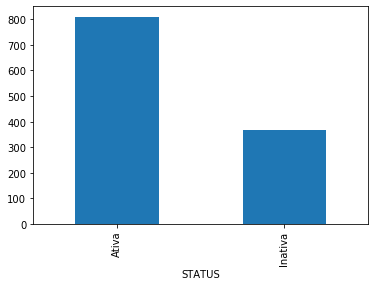

In [10]:
#GRÁFICO POR SIGLA DE MOTIVO
df = dataDisp.groupby(['STATUS'])['STATUS'].count()
df.plot.bar()

Com os gráficos abaixo, vemos o histograma de cada um dos features, e a relação de um com o outro, mostrando o quanto uma variável é relacionada com a outra. Em casos de maiores aglomerações e uma pré-disposição a formação de uma reta, temos uma relação linear entre as variáveis.

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


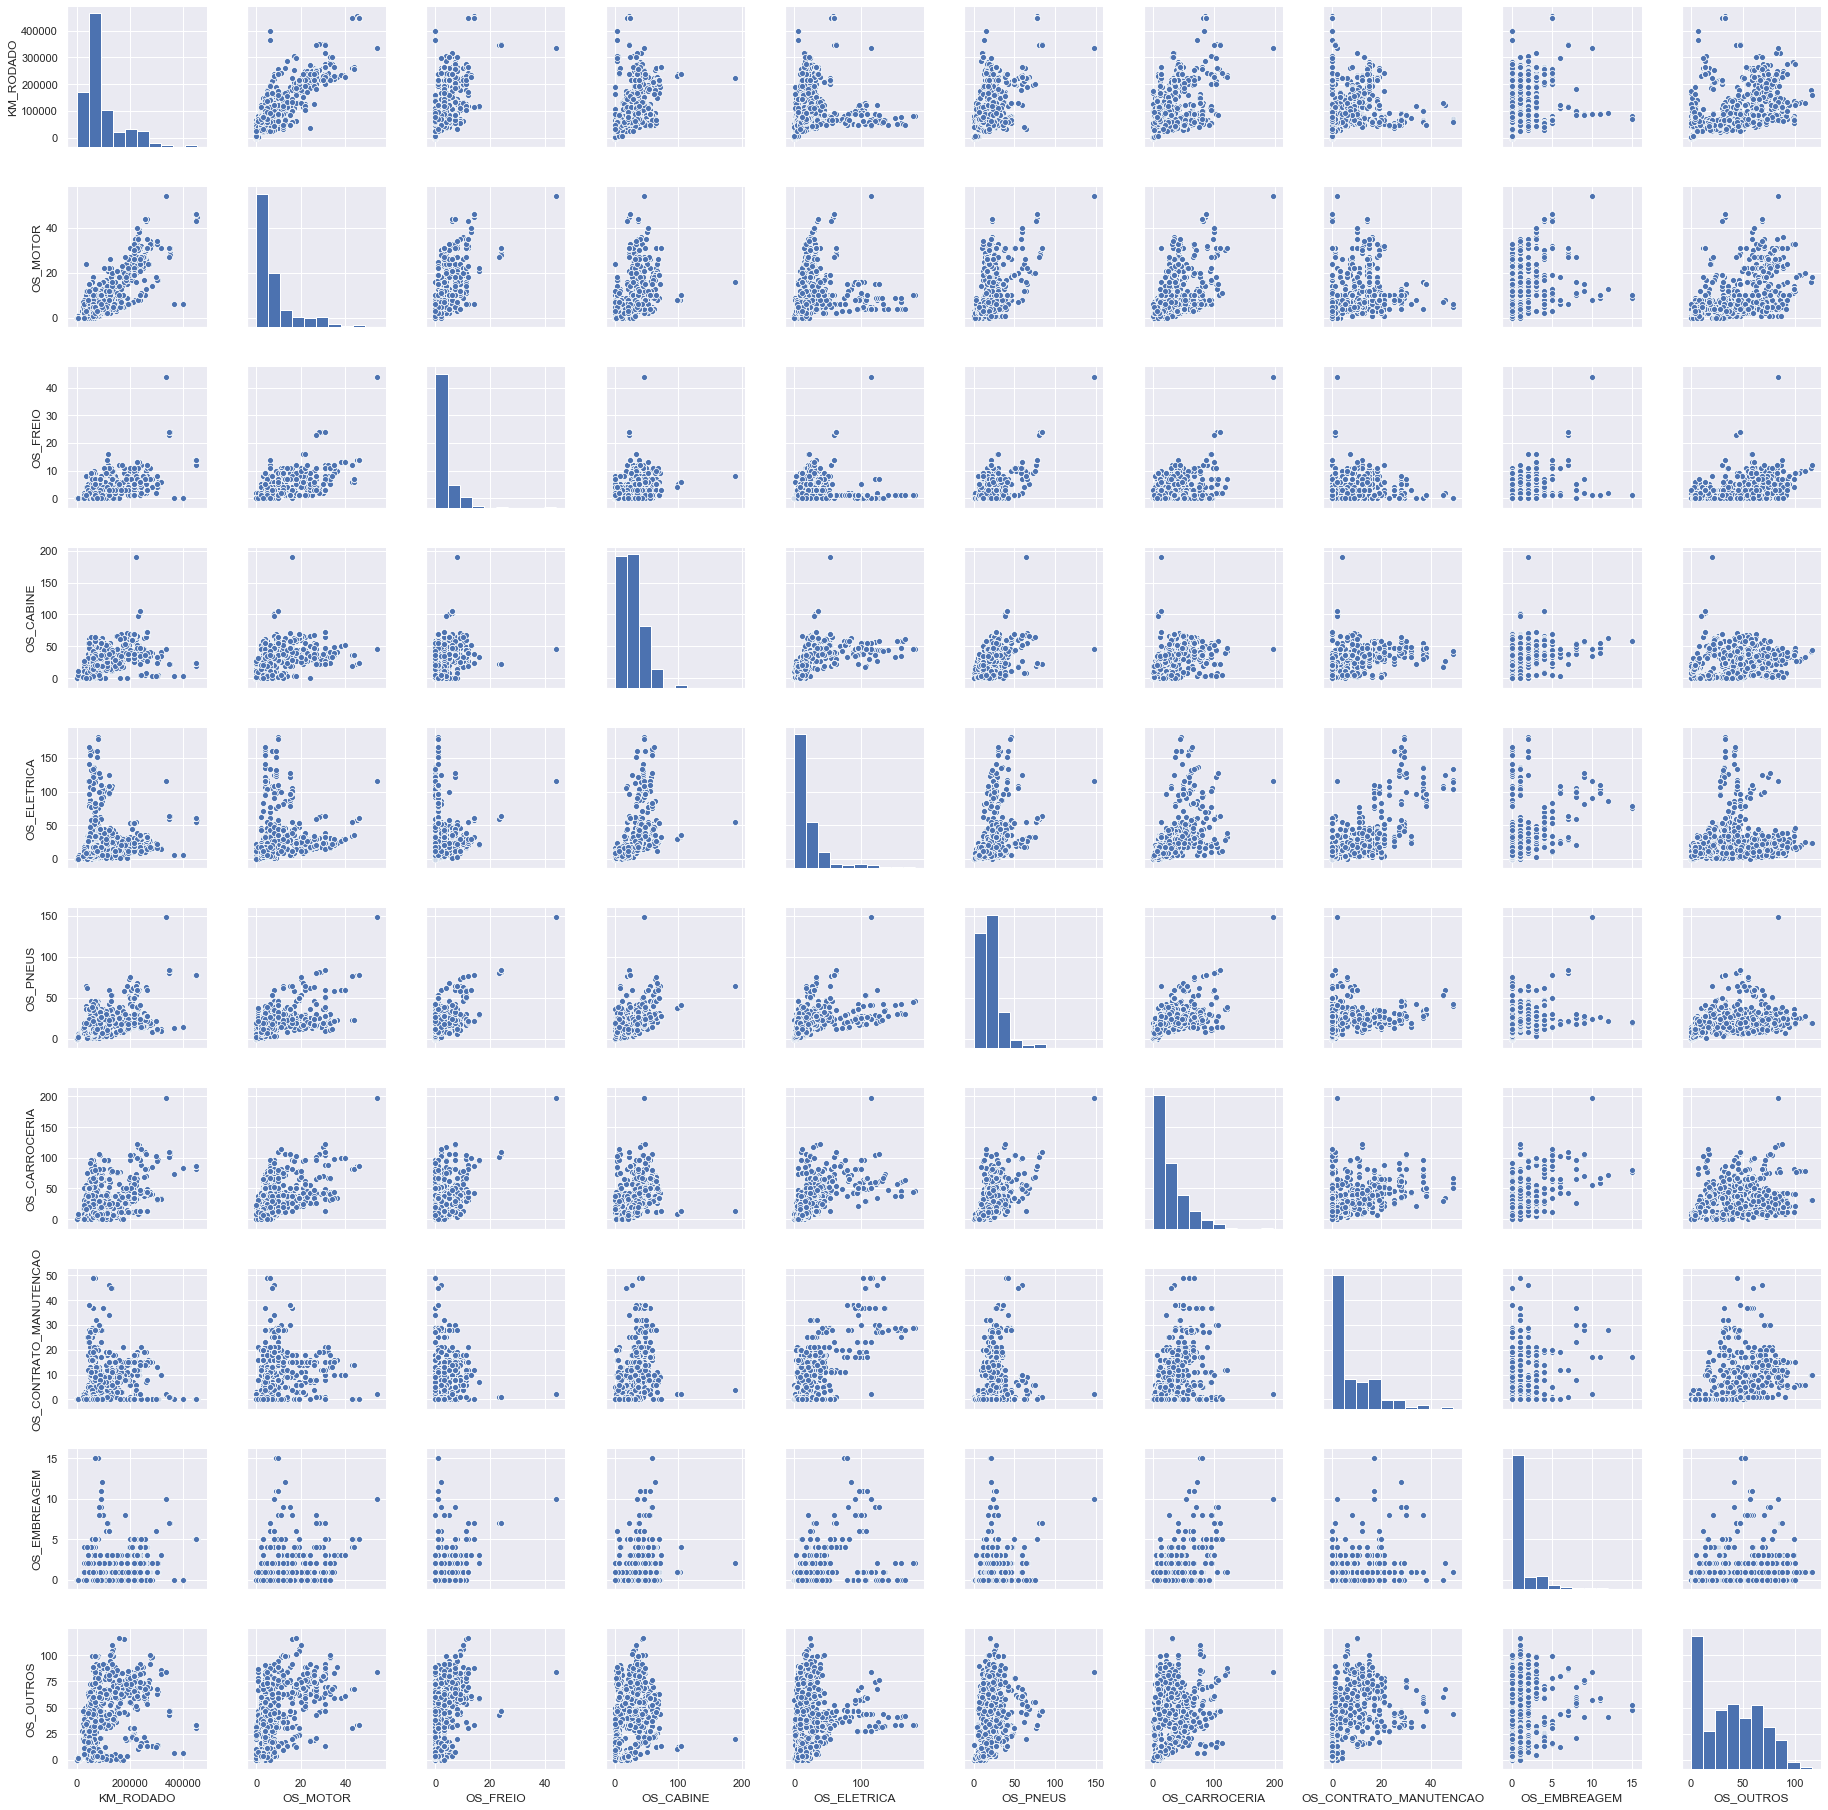

In [11]:
#Distribuição dos dados
sb.set()
cols = ['KM_RODADO', 'OS_MOTOR', 'OS_FREIO', 'OS_CABINE', 'OS_ELETRICA', 'OS_PNEUS', 'OS_CARROCERIA','OS_CONTRATO_MANUTENCAO','OS_EMBREAGEM', 'OS_OUTROS']
sb.pairplot(dataDisp[cols], size = 2.5)
plt.show();

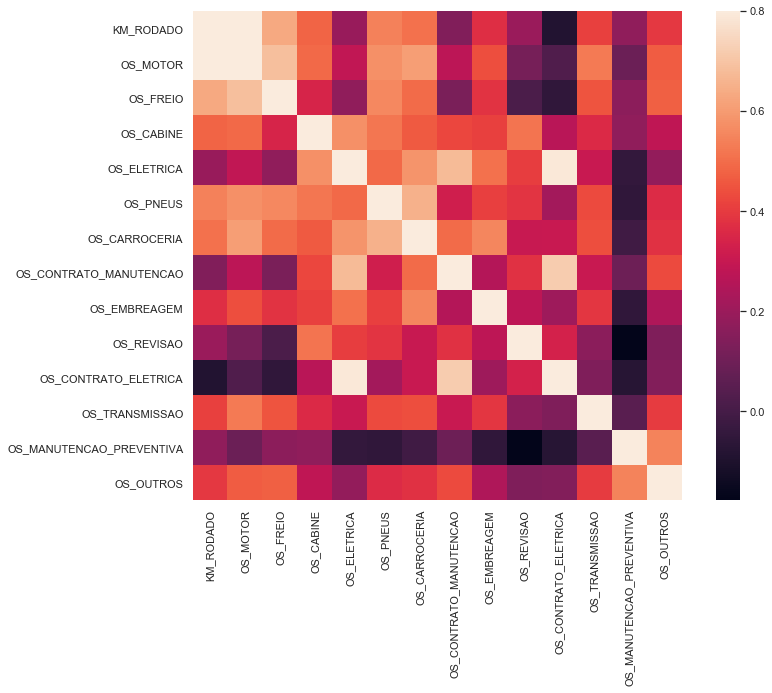

In [12]:
corrmat = dataDisp.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);

Abaixo vemos as 10 variáveis mais próximas do Km Rodado, que é a variável mais importante para o nosso problema

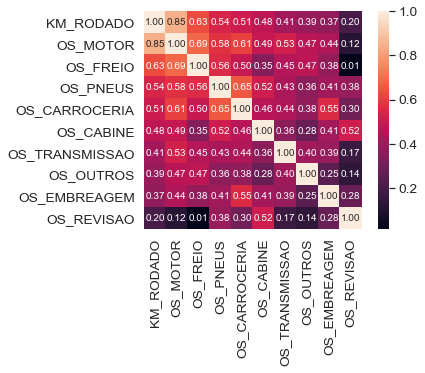

In [13]:

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'KM_RODADO')['KM_RODADO'].index
cm = np.corrcoef(dataDisp[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Pré Processamento

Troca do status de valor categórico para um valor numérico. No nosso caso, apenas 0 e 1, pois são só duas classes. Todas as variáveis categóricas são removidas antes das ana´lises com os modelos de treinamento.

In [14]:
dataDisp['target'] = np.where(dataDisp['STATUS']=='Ativa', 0, 1)

In [77]:
# Organizar nossos dados
label_names =  data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

# Organizar nossos dados
label_names_disp = np.asarray(['Ativa','Inativa'])
labels_disp = np.asarray(dataDisp['target'])
feature_names_disp = np.asarray(dataDisp.drop(['STATUS','SIGLA','PLACA','target'], axis=1).columns)
features_disp = np.asarray(dataDisp.drop(['STATUS','SIGLA','PLACA','target'], axis=1))

In [16]:
# Olhando para os nossos dados
print(label_names)
print(labels[0])
print(feature_names)
print(features[0])

# Olhando para os nossos dados
print(label_names_disp)
print(labels_disp[0])
print(feature_names_disp[0])
print(features_disp[2])

['malignant' 'benign']
0
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['Ativa' 'Inativa']
1
KM_RODADO
[60011     3     1    16     8     8     8     1     0     0     0     2
     3   

In [17]:
# Dividir nossos dados
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Dividir nossos dados
train_disp, test_disp, train_labels_disp, test_labels_disp = train_test_split(features_disp,
                                                          labels_disp,
                                                          test_size=0.33, random_state=42)

### Classificador Nave Bayes

In [18]:
# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
#model = gnb.fit(train, train_labels)

# Treinar nosso classificador
modelDisp = gnb.fit(train_disp, train_labels_disp)

In [19]:
# Fazer previsões
#preds = gnb.predict(test)
#print(preds)

# Fazer previsões
predsDisp = gnb.predict(test_disp)
#print(predsDisp)
# Avaliar a precisão
#print(accuracy_score(test_labels, preds))

# Avaliar a precisão
print("Accuracy Score: ",accuracy_score(test_labels_disp, predsDisp))
print("F1 Score: ", f1_score(test_labels_disp, predsDisp))
scores = cross_val_score(gnb, features_disp, labels_disp, cv=5)
#print(scores)
print("Acurácia Média Cross Validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy Score:  0.6709511568123393
F1 Score:  0.4576271186440678
Acurácia Média Cross Validation: 0.69 (+/- 0.16)


### Classificador KNN

In [20]:
n = np.sqrt(len(features_disp))
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(train_disp, train_labels_disp)
prediction = knn.predict(test_disp)
print("N escolhido: 38")
print("Accuracy Score: ",accuracy_score(test_labels_disp, prediction))
print("F1 Score: ", f1_score(test_labels_disp, prediction))
scores = cross_val_score(knn, features_disp, labels_disp, cv=5)
#print(scores)
print("Acurácia Média Cross Validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

N escolhido: 38
Accuracy Score:  0.7146529562982005
F1 Score:  0.3105590062111801
Acurácia Média Cross Validation: 0.66 (+/- 0.08)


### Parâmetros para utilização no GridSearch

In [21]:
param_grid = { 
    'n_estimators': [5,10,100],
    'criterion' :['gini', 'entropy'],
    'max_depth': [6,7,8,10, None],
    'min_samples_leaf': [2,4,6,8],
}

param_clf_grid = { 
    'max_depth': [6,7,8,10, None],
    'min_samples_leaf': [2,4,6,8],
    'max_features': ['auto','sqrt'],
    'criterion' :['gini', 'entropy'],

}

param_xgb_grid = {
     'max_depth':[4,5],
     'min_child_weight':[4,5],
     'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/100.0 for i in range(75,90,5)],
     'colsample_bytree':[i/100.0 for i in range(75,90,5)],
     'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
}

grid_param = {
    'n_estimators': [100, 300],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10],
    'max_depth': [10, 20, None]
}



### Classificador Tree Decision

In [22]:
clf = DecisionTreeClassifier()
clf = clf.fit(train_disp,train_labels_disp)
y_pred = clf.predict(test_disp)
# Avaliar a precisão
#print(accuracy_score(test_labels, y_pred))
print("Accuracy Score: ", accuracy_score(test_labels_disp, y_pred))
print("F1 Score: ", f1_score(test_labels_disp, y_pred))
#print(y_pred)
scores = cross_val_score(clf, features_disp, labels_disp, cv=5)
#print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy Score:  0.7249357326478149
F1 Score:  0.5596707818930041
Accuracy: 0.71 (+/- 0.13)


In [23]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_clf_grid, cv= 5)
CV_rfc.fit(train_disp, train_labels_disp)
y_pred = CV_rfc.predict(test_disp)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 8}

In [24]:
print("Accuracy Score: ", accuracy_score(test_labels_disp, y_pred))
print("F1 Score: ", f1_score(test_labels_disp, y_pred))
#print(y_pred)
scores = cross_val_score(CV_rfc, features_disp, labels_disp, cv=5)
#print(scores)
print("Acurácia Média Cross Validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy Score:  0.699228791773779
F1 Score:  0.47058823529411764
Acurácia Média Cross Validation: 0.68 (+/- 0.12)


### Classificador Random Forest

In [25]:
# random forest model creation
rfc = RandomForestClassifier(n_estimators=300, random_state=0)
rfc.fit(train_disp,train_labels_disp)
# predictions
rfc_predict = rfc.predict(test_disp)
print("Accuracy Score: ", accuracy_score(test_labels_disp, rfc_predict))
print("F1 Score: ", f1_score(test_labels_disp, rfc_predict))
#print(rfc_predict)
scores = cross_val_score(rfc, features_disp, labels_disp, cv=5)
#print(scores)
print("Acurácia Média Cross Validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
rfc.feature_importances_

Accuracy Score:  0.7429305912596401
F1 Score:  0.5238095238095237
Acurácia Média Cross Validation: 0.74 (+/- 0.12)


array([0.13903575, 0.08980512, 0.06066849, 0.1004186 , 0.10535323,
       0.08395573, 0.09761286, 0.04876645, 0.07021148, 0.02394151,
       0.02281792, 0.03490074, 0.0264319 , 0.09608021])

In [26]:
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_disp, train_labels_disp)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [27]:
CV_rfc.best_params_
y_pred = CV_rfc.predict(test_disp)
print("Accuracy Score: ", accuracy_score(test_labels_disp, y_pred))
print("F1 Score: ", f1_score(test_labels_disp, y_pred))
#print(y_pred)
scores = cross_val_score(CV_rfc, features_disp, labels_disp, cv=5)
#print(scores)
print("Acurácia Média Cross Validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy Score:  0.7275064267352185
F1 Score:  0.4803921568627451
Acurácia Média Cross Validation: 0.72 (+/- 0.06)


### Classificador XGBoost

In [28]:
model = XGBClassifier()
model.fit(train_disp, train_labels_disp)
xgb_predict = model.predict(test_disp)
print("Accuracy Score: ", accuracy_score(test_labels_disp, xgb_predict))
print("F1 Score: ", f1_score(test_labels_disp, xgb_predict))
scores = cross_val_score(model, features_disp, labels_disp, cv=5)
#print(scores)
print("Acurácia Média Cross Validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy Score:  0.7480719794344473
F1 Score:  0.5663716814159292
Acurácia Média Cross Validation: 0.73 (+/- 0.13)


In [29]:

CV_xgb = GridSearchCV(estimator=model, param_grid=param_xgb_grid, cv= 5)
CV_xgb.fit(train_disp, train_labels_disp)

CV_xgb.best_params_
cv_xgb_predict = CV_xgb.predict(test_disp)
print(accuracy_score(test_labels_disp, cv_xgb_predict))


0.7223650385604113


In [30]:
CV_rfc.best_params_
y_pred = CV_xgb.predict(test_disp)
print("Accuracy Score: ", accuracy_score(test_labels_disp, y_pred))
print("F1 Score: ", f1_score(test_labels_disp, y_pred))
#print(y_pred)
scores = cross_val_score(CV_rfc, features_disp, labels_disp, cv=5)
#print(scores)
print("Acurácia Média Cross Validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy Score:  0.7223650385604113
F1 Score:  0.5304347826086957
Acurácia Média Cross Validation: 0.72 (+/- 0.07)


### Classificador Regressão Logística

In [31]:
logreg_clf = LogisticRegression()

In [32]:
logreg_clf.fit(train_disp, train_labels_disp)
logPred = logreg_clf.predict(test_disp)
print("Accuracy Score: ", accuracy_score(test_labels_disp, logPred))
print("F1 Score: ", f1_score(test_labels_disp, logPred))
#print(y_pred)
scores = cross_val_score(logreg_clf, features_disp, labels_disp, cv=5)
#print(scores)
print("Acurácia Média Cross Validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy Score:  0.7069408740359897
F1 Score:  0.0
Acurácia Média Cross Validation: 0.71 (+/- 0.05)


c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver o

### Classificadores Com Normalização

In [37]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(train_disp)
X_test_minmax = mm_scaler.transform(test_disp)

##### Regressão Logística

In [38]:
logreg_clf.fit(X_train_minmax, train_labels_disp)
logPred = logreg_clf.predict(X_test_minmax)

In [39]:
print(accuracy_score(test_labels_disp, logPred))

0.6863753213367609


##### KNN

In [52]:
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train_minmax, train_labels_disp)
prediction = knn.predict(X_test_minmax)

In [53]:
prediction
print(accuracy_score(test_labels_disp, prediction))

0.7249357326478149


##### Random Forests

In [54]:
rfcDois=RandomForestClassifier()
rfcDois.fit(X_train_minmax, train_labels_disp)
y_pred = rfcDois.predict(X_test_minmax)
print(accuracy_score(test_labels_disp, y_pred))

0.7352185089974294


##### XGBoost

In [55]:
model = XGBClassifier()
model.fit(X_train_minmax, train_labels_disp)
y_pred = model.predict(X_test_minmax)
print(accuracy_score(test_labels_disp, y_pred))

0.7455012853470437


### Mutual Information ###

Feature KM_RODADO: 0.114586
Feature OS_MOTOR: 0.066428
Feature OS_FREIO: 0.051834
Feature OS_CABINE: 0.065953
Feature OS_ELETRICA: 0.051557
Feature OS_PNEUS: 0.081123
Feature OS_CARROCERIA: 0.074043
Feature OS_CONTRATO_MANUTENCAO: 0.016279
Feature OS_EMBREAGEM: 0.046120
Feature OS_REVISAO: 0.008194
Feature OS_CONTRATO_ELETRICA: 0.025635
Feature OS_TRANSMISSAO: 0.053145
Feature OS_MANUTENCAO_PREVENTIVA: 0.000000
Feature OS_OUTROS: 0.063912


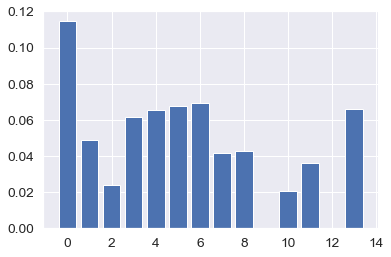

In [56]:
from matplotlib import pyplot

mutual_info_classif(X=features_disp,y=labels_disp)
for i in range(len(mutual_info_classif(X=features_disp,y=labels_disp))):
    if i+2 >= 3:
        print('Feature %s: %f' % (dataDisp.columns[i+3], mutual_info_classif(X=features_disp,y=labels_disp)[i]))
    else:
        print('Feature %s: %f' % (dataDisp.columns[i+2], mutual_info_classif(X=features_disp,y=labels_disp)[i]))
pyplot.bar([i for i in range(len(mutual_info_classif(X=features_disp,y=labels_disp)))], mutual_info_classif(X=features_disp,y=labels_disp))
pyplot.show()

In [95]:
selecter = SelectKBest(score_func=mutual_info_classif, k=7)
selecter_disp = selecter.fit(features_disp,labels_disp)
cols = selecter.get_support(indices=True)
print(selecter.get_support())

[ True  True False False  True  True  True False False False  True False
 False  True]


In [96]:
new_disp_data = selecter_disp.fit_transform(features_disp,labels_disp)

# Dividir nossos dados
train_disp, test_disp, train_labels_disp, test_labels_disp = train_test_split(new_disp_data,
                                                          labels_disp,
                                                          test_size=0.33,  random_state=42)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
#clf = clf.fit(train,train_labels)
clf = clf.fit(train_disp,train_labels_disp)

#Predict the response for test dataset
#y_pred = clf.predict(test)
y_pred = clf.predict(test_disp)

# random forest model creation
rfcNorm = RandomForestClassifier()
rfcNorm.fit(train_disp,train_labels_disp)
# predictions
rfc_predict = rfcNorm.predict(test_disp)
print(accuracy_score(test_labels_disp, rfc_predict))
print(rfc_predict)

0.7429305912596401
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0]


In [44]:
# Inicializar nosso classificador
gnbNovo = GaussianNB()
# Treinar nosso classificador
modelDisp = gnbNovo.fit(train_disp, train_labels_disp)

predsDisp = gnbNovo.predict(test_disp)
print(accuracy_score(test_labels_disp, predsDisp))

print(predsDisp)

0.6863753213367609
[0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0]


### Redes Neurais ###

In [49]:
from keras import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Dividir nossos dados
train_disp, test_disp, train_labels_disp, test_labels_disp = train_test_split(features_disp,
                                                          labels_disp,
                                                          test_size=0.33, random_state=42)

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(14, activation='relu', input_dim=14))

# Add one hidden layer 
model.add(Dense(9, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

# Define the scaler 
scaler = StandardScaler().fit(train_disp)

# Scale the train set
X_train = scaler.transform(train_disp)

# Scale the test set
X_test = scaler.transform(test_disp)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train, train_labels_disp,epochs=100, batch_size=1, verbose=1)

Using TensorFlow backend.


Epoch 1/100
787/787 [==============================] - 1s 2ms/step - loss: 0.5759 - accuracy: 0.6811
Epoch 2/100
787/787 [==============================] - 1s 1ms/step - loss: 0.5491 - accuracy: 0.7039
Epoch 3/100
787/787 [==============================] - 1s 1ms/step - loss: 0.5369 - accuracy: 0.7078
Epoch 4/100
787/787 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7281
Epoch 5/100
787/787 [==============================] - 1s 1ms/step - loss: 0.5241 - accuracy: 0.7395
Epoch 6/100
787/787 [==============================] - 1s 1ms/step - loss: 0.5171 - accuracy: 0.7395
Epoch 7/100
787/787 [==============================] - 1s 1ms/step - loss: 0.5138 - accuracy: 0.7459
Epoch 8/100
787/787 [==============================] - 1s 1ms/step - loss: 0.5065 - accuracy: 0.7433
Epoch 9/100
787/787 [==============================] - 1s 1ms/step - loss: 0.5040 - accuracy: 0.7535
Epoch 10/100
787/787 [==============================] - 1s 1ms/step - loss: 0.4972 - accura

In [88]:
y_pred = model.predict(X_test)

teste_rn = (y_pred.round(2) < 0.50)
print(np.count_nonzero(y_pred.round(2) > 0.50, axis=1))
print("Acurácia: ", accuracy_score(test_labels_disp, np.count_nonzero(y_pred.round(2) > 0.50, axis=1)))
teste_rn = (y_pred.round(2))
X_test[0]

[0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0]
Acurácia:  0.712082262210797


array([-0.72548676,  0.23413492,  0.41623114,  0.17685552,  0.41971645,
       -0.47701929,  0.15824353,  1.90989984,  0.00466017,  0.75510022,
        1.46855431,  0.64170753, -0.86674676, -0.01962618])

[1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1
 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0]
Acurácia:  0.7249357326478149


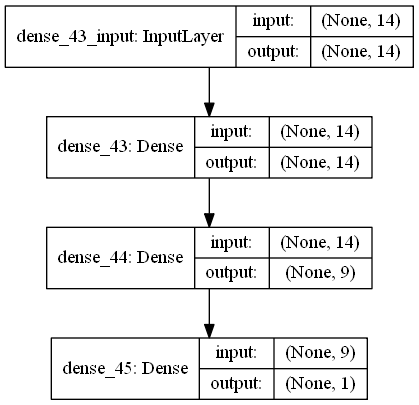

In [70]:

import keras
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
keras.utils.vis_utils.pydot = pyd

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [58]:
#Compiling the neural network
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [60]:
eval_model=model.evaluate(train_disp, train_labels_disp)
eval_model


787/787 [==============================] - 0s 24us/step


[126429.37229987294, 0.6810673475265503]

In [94]:
teste_real = np.asarray([12442,1,0,21,12,124,3,1,23,0,144,0,4,54])
teste_dois = teste_real.reshape(1,-1)
test_norm = scaler.transform(teste_dois)
y_pred = model.predict(test_norm)
print(y_pred.round(2))
print(test_norm)

[[0.]]
[[-1.07538858 -0.77583928 -0.63790855 -0.21897895 -0.38273172  7.33970822
  -0.89461108 -0.68070613 11.53125204 -0.74178611 15.98776986 -0.61613513
   1.90613819  0.59102181]]


array([-0.72548676,  0.23413492,  0.41623114,  0.17685552,  0.41971645,
       -0.47701929,  0.15824353,  1.90989984,  0.00466017,  0.75510022,
        1.46855431,  0.64170753, -0.86674676, -0.01962618])

### Conclusão

Os classificadores em geral apresentaram resultados muito próximos, mesmo quando partimos de uma estratégia bayesiana para uma estratégia com Rede Neural. Levando isso em consideração, e levando o fato de que alguns classificadores retornaram resultados apenas de um grupo, o que poderá causar um enviesamento na resposta para casos genéricos, iremos partir para a solução utilizando o classificador de melhor resultado e o qual trouxe uma resposta mais genérica e não tendenciosa para apenas um grupo.

Não trataremos os dados de forma normalizada, por não trazer diferenças significativas no score final do preditor. Durante as analises, foi possivel verificar que algumas features não traziam valor significativo, portanto, uma seleção das melhores features foi implantada, de tal modo e escolher features a partir de um threshold significativo estiupulado. 

### Exportação do Modelo

In [57]:
filename = 'random_forest_disp.sav'
#joblib.dump(rfc, filename)
joblib.dump(model, filename)

['random_forest_disp.sav']

In [70]:
# load the model from disk
filename = 'random_forest_disp.sav'
loaded_model = joblib.load(filename)
result = loaded_model.predict(test_disp)
print(result)

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 18 